In [1]:
import pandas as pd
import numpy as np

In [53]:
weathers = [3, 2, 5, 1, -4, -5, 1, 0, -2, -2, -3, 5, 5, 2]
## para_PV + 0.5 * weathers
para_PV1 = [5, 5, 5, 6, 6, 6, 7, 7, 8, 9, 10, 10, 11, 12, 12, 11, 11, 10, 8, 7, 7, 6, 6, 5] 
para_PV2 = [5, 5, 6, 6, 7, 7, 7, 8, 9, 11, 13, 13, 12, 10, 10, 10, 8, 6, 7, 7, 5, 5, 6, 5] 
## para_WD - 2 * weathers
para_WD = [8 for i in range(0, 24)]
## para_CP + weathers
para_CP = [16, 15, 15, 18, 20, 22, 22, 24, 26, 27, 30, 30, 30, 30, 30, 30, 28, 26, 24, 28, 28, 28, 26, 22, 20]

In [54]:
PV1 = []
PV2 = []
WD = []
CP = []
for day in range(0, 14) :
    for hour in range(0, 24) :
        PV1.append(0.8 * para_PV1[hour] + 0.5 * weathers[day] + 1)
        PV2.append(0.8 * para_PV2[hour] + 0.5 * weathers[day] + 1)
        WD.append(para_WD[hour] - 0.3 * weathers[day] + 0.2)
        CP.append(0.5 * para_CP[hour] + 0.1 * weathers[day] + 11)

In [55]:
hours = []
energyPower = []
totalPower = []
for hour in range(0, 14 * 24) :
    hours.append(hour)
    energyPower.append(PV1[hour] + PV2[hour] + WD[hour])
    totalPower.append(energyPower[hour] - CP[hour])

In [56]:
import matplotlib.pyplot as plt

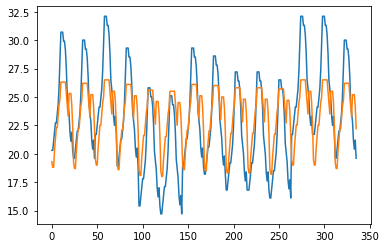

In [57]:
plt.plot(hours, energyPower)
plt.plot(hours, CP)

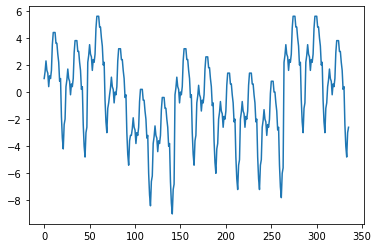

In [58]:
plt.plot(hours, totalPower)

In [59]:
def Weibull_reliability_function(x) :
    return pow(2.718281828459,-pow((x - 9.6)/213,4.2))

updTotalEnergyPower = []
for hour in range(0, 14 * 24) :
    updTotalEnergyPower.append(totalPower[hour] * Weibull_reliability_function(hour))

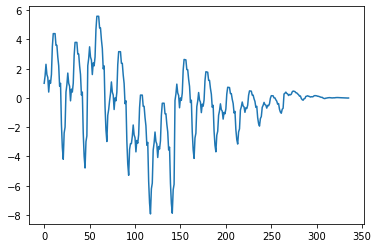

In [60]:
plt.plot(hours, updTotalEnergyPower)

In [61]:
import math

In [62]:
sumEnergyPower = []
sumEnergyPower.append(updTotalEnergyPower[0])
for hour in range(1, 14 * 24) :
    sumEnergyPower.append(sumEnergyPower[hour - 1] + updTotalEnergyPower[hour])
#    updSumPower.append(sumPower[hour] * Weibull_reliability_function(hour))

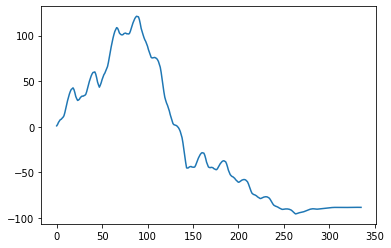

In [63]:
plt.plot(hours, sumEnergyPower)

In [64]:
df = pd.DataFrame()

In [65]:
index = []
names = []
types = []
Energy = []
dTime = []
count = -1
for day in range(15, 29) :
    for hour in range(0, 24) :
        count = count + 1
        for j in range(1, 5) :
            index.append(1000 + j)
            if hour >= 10 : 
                dTime.append("{}-{}:00".format(20210500 + day, hour))
            else :
                dTime.append("{}-0{}:00".format(20210500 + day, hour))
            if j == 1 :
                names.append("Photovoltaics Tech")
                types.append("photovoltaics")
                Energy.append(PV1[count])
            if j == 2 :
                names.append("Solar Energy PV")
                types.append("photovoltaics")
                Energy.append(PV2[count])
            if j == 3 :
                names.append("Giant Wind Power")
                types.append("wind_power")
                Energy.append(WD[count])
            if j == 4 :
                names.append("City consumption")
                types.append("consumption")
                Energy.append(-CP[count])

In [66]:
df = pd.DataFrame(columns = ['id', 'name', 'type', 'dTime', 'energy_power'])

In [67]:
df['id'] = index

In [68]:
df['name'] = names

In [69]:
df['type'] = types

In [70]:
df['dTime'] = dTime

In [71]:
df['energy_power'] = Energy

In [72]:
df.head(100)

,id,name,type,dTime,energy_power
0,1001,Photovoltaics Tech,photovoltaics,20210515-00:00,6.5
1,1002,Solar Energy PV,photovoltaics,20210515-00:00,6.5
2,1003,Giant Wind Power,wind_power,20210515-00:00,7.3
3,1004,City consumption,consumption,20210515-00:00,-19.3
4,1001,Photovoltaics Tech,photovoltaics,20210515-01:00,6.5
...,...,...,...,...,...
95,1004,City consumption,consumption,20210515-23:00,-22.3
96,1001,Photovoltaics Tech,photovoltaics,20210516-00:00,6.0
97,1002,Solar Energy PV,photovoltaics,20210516-00:00,6.0
98,1003,Giant Wind Power,wind_power,20210516-00:00,7.6


In [73]:
df.to_csv("Weather_Based_Nodes.csv", index = False)